In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!cp /content/gdrive/MyDrive/Term10/PatternRecognition/kaggle.json /content/kaggle/kaggle.json

In [4]:
!chmod 600 /content/kaggle/kaggle.json

In [5]:
!pip install kaggle

In [6]:
!kaggle datasets download -d moazeldsokyx/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats
License(s): CC0-1.0
 99% 806M/817M [00:12<00:00, 82.7MB/s]
100% 817M/817M [00:12<00:00, 65.9MB/s]


In [7]:
#!unzip dogs-vs-cats.zip

In [8]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Define paths
train_path = '/content/dataset/train'
val_path = '/content/dataset/validation'
test_path = '/content/dataset/test'

In [14]:
def load_images_and_labels(path):
    images = []
    labels = []
    for label in ['cat', 'dog']:
        label_path = os.path.join(path, label)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize for consistency
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)


In [15]:
X_train, y_train = load_images_and_labels(train_path)
X_val, y_val = load_images_and_labels(val_path)
X_test, y_test = load_images_and_labels(test_path)

In [16]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [17]:
def preprocess_images(images):
    processed_images = []
    for img in images:
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Apply Gaussian Blur
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        # Apply edge detection
        edges = cv2.Canny(blur, 100, 200)
        # Apply morphological transformations
        kernel = np.ones((5, 5), np.uint8)
        morph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
        # Enhance image using histogram equalization
        enhance = cv2.equalizeHist(morph)
        processed_images.append(enhance)
    return np.array(processed_images)

In [18]:
X_train_processed = preprocess_images(X_train)
X_val_processed = preprocess_images(X_val)
X_test_processed = preprocess_images(X_test)

In [19]:
X_train_flattened = X_train_processed.reshape(X_train_processed.shape[0], -1)
X_val_flattened = X_val_processed.reshape(X_val_processed.shape[0], -1)
X_test_flattened = X_test_processed.reshape(X_test_processed.shape[0], -1)

In [20]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_flattened, y_train)

DecisionTreeClassifier()

In [21]:
y_val_pred = dt_model.predict(X_val_flattened)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy of Decision Tree: {val_accuracy}')

Validation Accuracy of Decision Tree: 0.5268


In [22]:
y_test_pred = dt_model.predict(X_test_flattened)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy of Decision Tree: {test_accuracy}')

Test Accuracy of Decision Tree: 0.5298932669930182


In [23]:
def display_sample_images(original, processed, index):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original[index], cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title("Processed Image")
    plt.imshow(processed[index], cmap='gray')
    plt.show()

In [26]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_flattened, y_train)

y_val_pred_rf = rf_model.predict(X_val_flattened)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f'Validation Accuracy of Random Forest: {val_accuracy_rf}')

y_test_pred_rf = rf_model.predict(X_test_flattened)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Test Accuracy of Random Forest: {test_accuracy_rf}')


RandomForestClassifier()

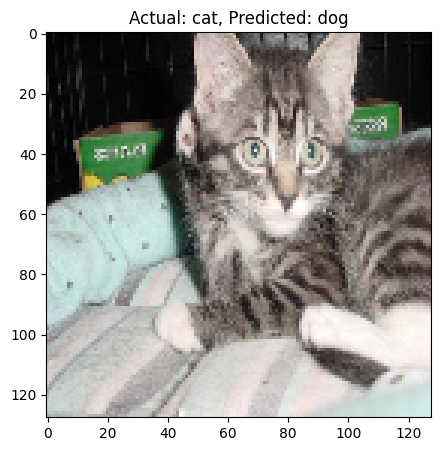

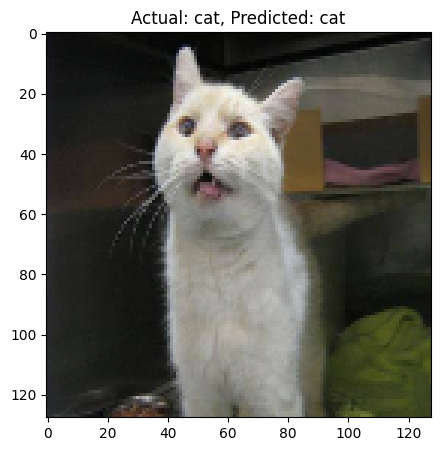

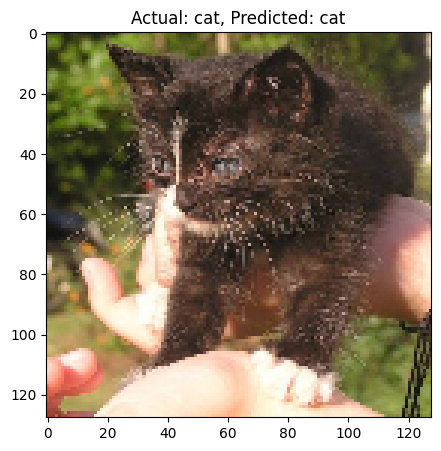

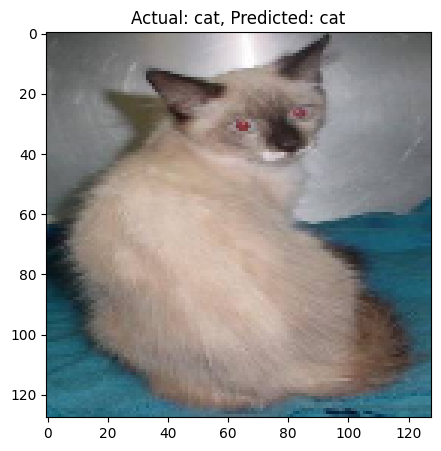

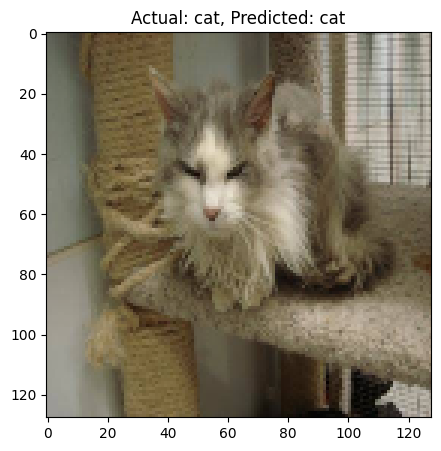

In [29]:
y_test_pred_rf = rf_model.predict(X_test_flattened)

# Display images after classification with labels
def display_images_with_labels(images, labels, predictions, index):
    plt.figure(figsize=(10, 5))
    plt.title(f"Actual: {labels[index]}, Predicted: {predictions[index]}")
    plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
    plt.show()

# Display a few images from the test set with their predicted labels
num_samples_to_display = 5
for i in range(num_samples_to_display):
    display_images_with_labels(X_test, le.inverse_transform(y_test), le.inverse_transform(y_test_pred_rf), i)